In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
file_path_desocupacion = r'C:\Users\azuka\OneDrive\Documentos\U\Analitica\indicadores_principales_p2002.xlsx'
hojas_desocupacion = pd.read_excel(file_path_desocupacion, sheet_name=None, header=1)
df_desocupacion = hojas_desocupacion['as']


In [3]:
df_desocupacion = df_desocupacion.drop(0)
df_desocupacion = df_desocupacion.dropna(how='all') 
df_desocupacion = df_desocupacion.drop([2, 3], axis=0) 

df_desocupacion.columns = [
    'Año', 'Trimestre', 
    'Población en edad de trabajar (Total)', 
    'Fuerza de trabajo (Total)', 
    'Ocupados (Total)', 'Desocupados (Total)', 
    'Desocupados (Cesantes)', 
    'Desocupados (Buscan trabajo por primera vez)', 
    'Fuera de la fuerza de trabajo (Total)', 
    'Fuera de la fuerza de trabajo (Iniciadores)',
    'Fuera de la fuerza de trabajo (Inactivos potencialmente activos)', 
    'Fuera de la fuerza de trabajo (Inactivos habituales)', 
    'Tasa de desocupación', 'Tasa de ocupación', 'Tasa de participación'
]

df_desocupacion.iloc[:, 2:] = df_desocupacion.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

print("Datos de desocupación:")
print(df_desocupacion.head())

Datos de desocupación:
    Año  Trimestre Población en edad de trabajar (Total)  \
4   NaN        NaN                                   NaN   
5  2010  Ene - Mar                              13198.89   
6  2010  Feb - Abr                             13216.719   
7  2010  Mar - May                             13234.538   
8  2010  Abr - Jun                              13252.26   

  Fuerza de trabajo (Total) Ocupados (Total) Desocupados (Total)  \
4                       NaN              NaN                 NaN   
5               7613.820237      6925.550722          688.269515   
6               7625.804763      6967.930976          657.873787   
7               7646.678052      6971.790946          674.887107   
8               7682.790372      7030.691472            652.0989   

  Desocupados (Cesantes) Desocupados (Buscan trabajo por primera vez)  \
4                    NaN                                          NaN   
5              595.17446                                    9

In [4]:
fig = px.line(df_desocupacion, x="Año", y="Tasa de desocupación", title="Evolución de la Tasa de Desocupación")
fig.show()

In [5]:
df_desocupacion_anual = df_desocupacion.groupby('Año')['Tasa de desocupación'].mean().reset_index()
print("Datos de desocupación anual:")
print(df_desocupacion_anual.head())

Datos de desocupación anual:
    Año Tasa de desocupación
0  2010             8.062352
1  2011             7.144536
2  2012             6.418607
3  2013             5.980178
4  2014             6.322844


# Visualizacion precios de ventas vivienda


In [6]:
file_path = r'C:\Users\azuka\OneDrive\Documentos\U\Analitica\PRIndicedePreciosdeVivienda_Banco Central.xlsx'
ipv_zona_geografica = pd.read_excel(file_path, sheet_name=0, skiprows=3)

In [7]:
file_path_vivienda = r'C:\Users\azuka\OneDrive\Documentos\U\Analitica\PRIndicedePreciosdeVivienda_Banco Central.xlsx'
ipv_zona_geografica = pd.read_excel(file_path_vivienda, sheet_name=0, skiprows=3)

ipv_zona_geografica_clean = ipv_zona_geografica.dropna(how='all', axis=1)
ipv_zona_geografica_clean.columns = [
    'Año', 'Trimestre', 'General', 'Casas', 'Departamentos', 
    'General_tri', 'Casas_tri', 'Departamentos_tri', 
    'General_anu', 'Casas_anu', 'Departamentos_anu'
]

ipv_zona_geografica_clean = ipv_zona_geografica_clean[['Año', 'General', 'Casas', 'Departamentos']]
ipv_zona_geografica_clean['Año'] = pd.to_numeric(ipv_zona_geografica_clean['Año'], errors='coerce')
ipv_zona_geografica_clean['General'] = pd.to_numeric(ipv_zona_geografica_clean['General'], errors='coerce')
ipv_zona_geografica_clean['Casas'] = pd.to_numeric(ipv_zona_geografica_clean['Casas'], errors='coerce')
ipv_zona_geografica_clean['Departamentos'] = pd.to_numeric(ipv_zona_geografica_clean['Departamentos'], errors='coerce')

ipv_zona_geografica_clean = ipv_zona_geografica_clean.dropna(subset=['Año'])
ipv_zona_geografica_clean = ipv_zona_geografica_clean[ipv_zona_geografica_clean['Año'] >= 2013]

print("Datos de precios de vivienda limpio:")
print(ipv_zona_geografica_clean.head())

fig = px.line(ipv_zona_geografica_clean, 
              x='Año', 
              y=['General', 'Casas', 'Departamentos'], 
              labels={'value': 'Índice de Precios', 'variable': 'Categoría'},
              title='Evolución del Índice de Precios de Vivienda por Categoría')
fig.show()

Datos de precios de vivienda limpio:
       Año     General       Casas  Departamentos
46  2013.0  129.800890  132.932147     126.226441
47  2013.0  134.192260  137.371567     130.564706
48  2013.0  135.451158  138.266320     132.251194
49  2013.0  139.356279  141.972336     136.392452
50  2014.0  139.384357  142.121621     136.267826


In [8]:
vivienda_anual = ipv_zona_geografica_clean.groupby('Año')['General'].mean().reset_index()
print("Datos de precios de vivienda anual:")
print(vivienda_anual.head())

Datos de precios de vivienda anual:
      Año     General
0  2013.0  134.700146
1  2014.0  144.866929
2  2015.0  159.461607
3  2016.0  164.043313
4  2017.0  174.229034


# Visualizacion IPC

In [9]:
file_path_ipc = r'C:\Users\azuka\OneDrive\Documentos\U\Analitica\serie-histórica-empalmada-ipc-diciembre-2009-a-la-fecha-xls.xlsx'
IPCR = pd.read_excel(file_path_ipc, sheet_name=0, skiprows=2)

In [10]:
IPC_Clean = IPCR.dropna(how='all', axis=1)
IPC_Clean.columns = ['Año', 'Mes', 'Índice', 'Variación Mensual (%)', 'Variación 12 Meses (%)']

IPC_Clean['Año'] = pd.to_numeric(IPC_Clean['Año'], errors='coerce')
IPC_Clean['Mes'] = pd.to_numeric(IPC_Clean['Mes'], errors='coerce')
IPC_Clean['Índice'] = pd.to_numeric(IPC_Clean['Índice'], errors='coerce')
IPC_Clean['Variación Mensual (%)'] = pd.to_numeric(IPC_Clean['Variación Mensual (%)'], errors='coerce')
IPC_Clean['Variación 12 Meses (%)'] = pd.to_numeric(IPC_Clean['Variación 12 Meses (%)'], errors='coerce')

IPC_Clean = IPC_Clean.dropna(subset=['Año'])
IPC_Clean = IPC_Clean[IPC_Clean['Año'] >= 2013]

print("Datos del IPC limpio:")
print(IPC_Clean.head())

fig = px.line(IPC_Clean, 
              x='Año', 
              y=['Índice', 'Variación Mensual (%)', 'Variación 12 Meses (%)'], 
              labels={'value': 'Valor', 'variable': 'Categoría'},
              title='Evolución del Índice de Precios al Consumidor')
fig.show()

Datos del IPC limpio:
       Año  Mes  Índice  Variación Mensual (%)  Variación 12 Meses (%)
38  2013.0  1.0   62.67                    0.2                     1.6
39  2013.0  2.0   62.74                    0.1                     1.3
40  2013.0  3.0   62.98                    0.4                     1.5
41  2013.0  4.0   62.68                   -0.5                     1.0
42  2013.0  5.0   62.67                    0.0                     0.9


In [11]:
ipc_anual = IPC_Clean.groupby('Año')['Variación 12 Meses (%)'].mean().reset_index()
print("Datos del IPC anual:")
print(ipc_anual.head())

Datos del IPC anual:
      Año  Variación 12 Meses (%)
0  2013.0                1.791667
1  2014.0                4.708333
2  2015.0                4.341667
3  2016.0                3.791667
4  2017.0                2.200000


In [12]:
file_path_natalidad = r'C:\Users\azuka\OneDrive\Documentos\U\Analitica\setdedatos.csv'
natalidad = pd.read_csv(file_path_natalidad, encoding= 'latin1')

print("Datos de natalidad:")
print(natalidad.head())

natalidad['Año'] = pd.to_numeric(natalidad['Año'], errors='coerce')
natalidad['Nacimientos'] = pd.to_numeric(natalidad['Nacimientos'], errors='coerce')
natalidad['Defunciones'] = pd.to_numeric(natalidad['Defunciones'], errors='coerce')

natalidad = natalidad[natalidad['Año'] >= 2013]

natalidad = natalidad.dropna(subset=['Año'])

print("Datos de natalidad filtrados:")
print(natalidad.head())

Datos de natalidad:
    Año  Nacimientos  Defunciones
0  2023       171992       121270
1  2022       189310       136958
2  2021       177255       137439
3  2020       194952       125833
4  2019       210188       109658
Datos de natalidad filtrados:
    Año  Nacimientos  Defunciones
0  2023       171992       121270
1  2022       189310       136958
2  2021       177255       137439
3  2020       194952       125833
4  2019       210188       109658


In [13]:
df_combined_anual = df_desocupacion_anual.merge(
    vivienda_anual, on='Año', how='inner'
).merge(
    ipc_anual, on='Año', how='inner'
).merge(
    natalidad[['Año', 'Nacimientos']], on='Año', how='inner'
)

print("Datos combinados anuales:")
print(df_combined_anual.head())

print("Tipos de datos en df_combined_anual:")
print(df_combined_anual.dtypes)

df_combined_anual['Año'] = pd.to_numeric(df_combined_anual['Año'], errors='coerce')
df_combined_anual['Tasa de desocupación'] = pd.to_numeric(df_combined_anual['Tasa de desocupación'], errors='coerce')
df_combined_anual['General'] = pd.to_numeric(df_combined_anual['General'], errors='coerce')
df_combined_anual['Variación 12 Meses (%)'] = pd.to_numeric(df_combined_anual['Variación 12 Meses (%)'], errors='coerce')
df_combined_anual['Nacimientos'] = pd.to_numeric(df_combined_anual['Nacimientos'], errors='coerce')

print("Cantidad de valores NaN después de la conversión a numérico:")
print(df_combined_anual[['Tasa de desocupación', 'General', 'Variación 12 Meses (%)', 'Nacimientos']].isna().sum())

df_combined_anual_clean = df_combined_anual.dropna(subset=['Tasa de desocupación', 'General', 'Variación 12 Meses (%)', 'Nacimientos'])

print("Datos combinados anuales después de eliminar filas con NaN:")
print(df_combined_anual_clean.head())
print("Cantidad de filas después de limpieza:", df_combined_anual_clean.shape[0])

Datos combinados anuales:
    Año Tasa de desocupación     General  Variación 12 Meses (%)  Nacimientos
0  2013             5.980178  134.700146                1.791667       242005
1  2014             6.322844  144.866929                4.708333       250997
2  2015              6.24376  159.461607                4.341667       244670
3  2016             6.491577  164.043313                3.791667       231749
4  2017             6.665118  174.229034                2.200000       219186
Tipos de datos en df_combined_anual:
Año                        object
Tasa de desocupación       object
General                   float64
Variación 12 Meses (%)    float64
Nacimientos                 int64
dtype: object
Cantidad de valores NaN después de la conversión a numérico:
Tasa de desocupación      0
General                   0
Variación 12 Meses (%)    0
Nacimientos               0
dtype: int64
Datos combinados anuales después de eliminar filas con NaN:
    Año  Tasa de desocupación     Gener

Correlación entre Tasa de desocupación y Nacimientos: -0.86 (p-valor: 0.0127)
Correlación entre General y Nacimientos: -0.89 (p-valor: 0.0065)
Correlación entre Variación 12 Meses (%) y Nacimientos: 0.61 (p-valor: 0.1449)


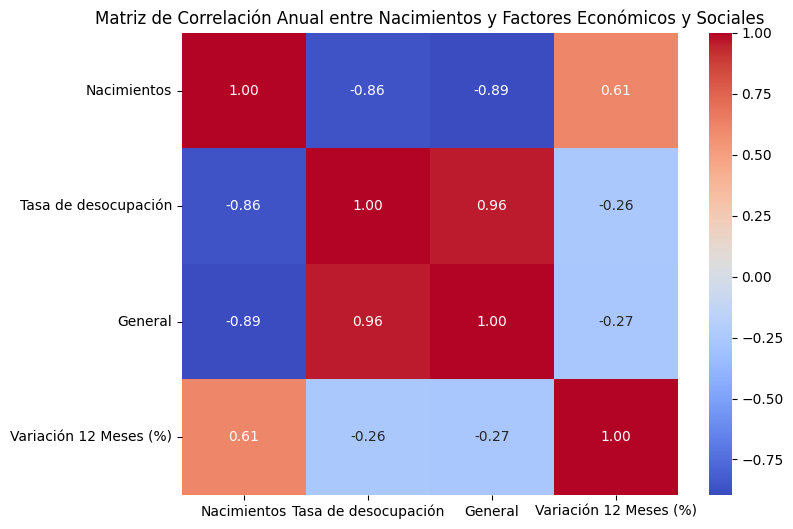

                            OLS Regression Results                            
Dep. Variable:            Nacimientos   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     19.45
Date:                Wed, 09 Oct 2024   Prob (F-statistic):             0.0181
Time:                        16:04:26   Log-Likelihood:                -66.181
No. Observations:                   7   AIC:                             140.4
Df Residuals:                       3   BIC:                             140.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.07

c:\Users\azuka\anaconda3\envs\Visu\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 7 samples were given.



In [14]:
factores_anual = ['Tasa de desocupación', 'General', 'Variación 12 Meses (%)']
variable_dependiente_anual = 'Nacimientos'

for factor in factores_anual:
    corr, p_val = pearsonr(df_combined_anual_clean[factor], df_combined_anual_clean[variable_dependiente_anual])
    print(f"Correlación entre {factor} y {variable_dependiente_anual}: {corr:.2f} (p-valor: {p_val:.4f})")

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix_anual = df_combined_anual_clean[['Nacimientos'] + factores_anual].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_anual, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación Anual entre Nacimientos y Factores Económicos y Sociales')
plt.show()

if df_combined_anual_clean.shape[0] > len(factores_anual) + 1:
    X = df_combined_anual_clean[factores_anual]
    y = df_combined_anual_clean[variable_dependiente_anual]
    
    X = sm.add_constant(X)
    
    modelo = sm.OLS(y, X).fit()
    
    print(modelo.summary())
    
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print("Factor de Inflación de la Varianza (VIF):")
    print(vif_data)
else:
    print("Tamaño de muestra insuficiente para realizar regresión múltiple.")

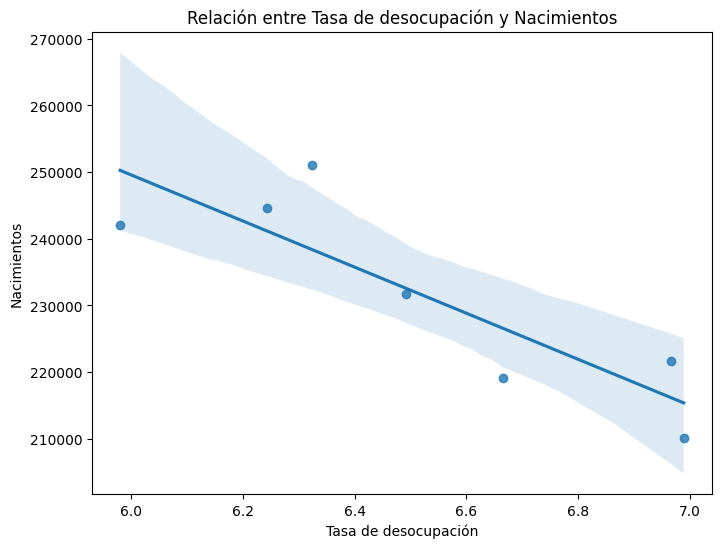

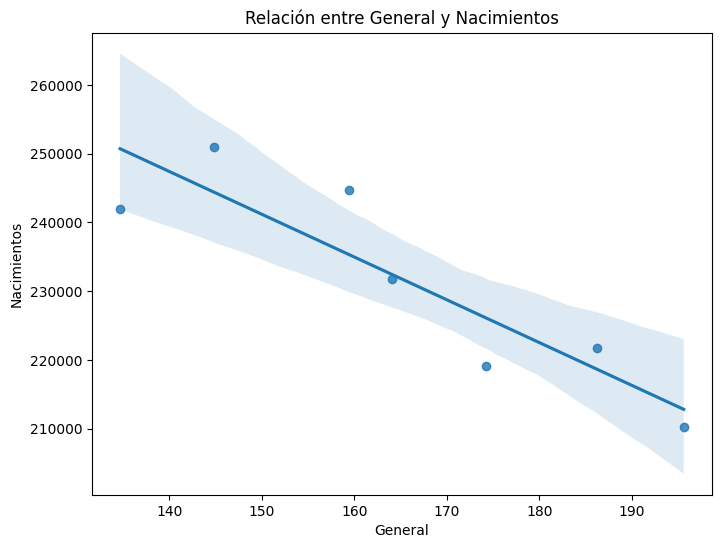

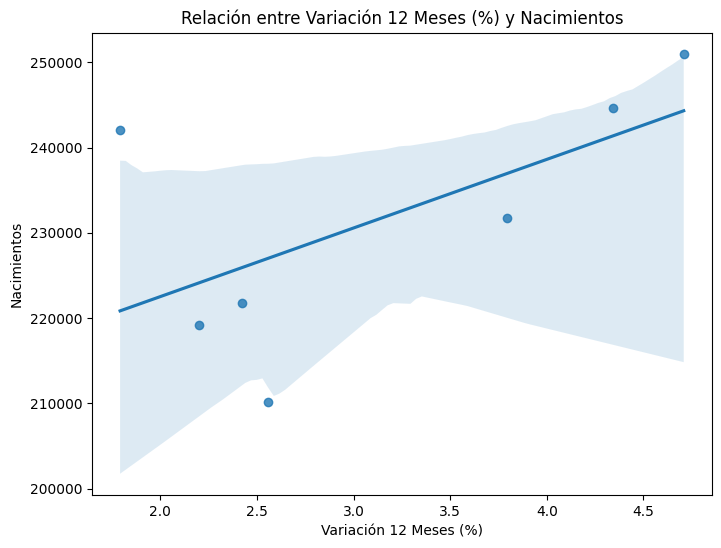

In [15]:
for factor in factores_anual:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=factor, y=variable_dependiente_anual, data=df_combined_anual_clean)
    plt.title(f'Relación entre {factor} y {variable_dependiente_anual}')
    plt.xlabel(factor)
    plt.ylabel(variable_dependiente_anual)
    plt.show()

import plotly.graph_objects as go

fig = go.Figure()